In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiklarga chiroyli chiqishi uchun
plt.style.use("seaborn-v0_8")


## 1. Importing Libraries
We start by importing the necessary libraries for data analysis and visualization:
- `pandas` → for data manipulation and analysis  
- `matplotlib` and `seaborn` → for creating plots and visualizations  


## 2. Loading the Dataset
We use the dataset **`ecommerce_transactions.csv`** which contains transaction-level data.  
The first 5 rows are displayed to verify that the data has been loaded correctly.  


In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Mac46-47\Downloads\ecommerce_transactions.csv")
df.head()


,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB


Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Transaction_Date    0
dtype: int64

## 3. Dataset Overview
We check:
- Number of rows and columns  
- Data types of each column  
- Missing values (if any)  
- Unique values in categorical features (Country, Product Category, Payment Method)  

This step helps us understand the structure of the dataset.


## 4. Transactions by Country
We visualize the **number of transactions per country** to identify where most of the sales are happening.


In [6]:
print(df['Country'].unique())
print(df['Product_Category'].unique())
print(df['Payment_Method'].unique())


['Mexico' 'India' 'France' 'Germany' 'Canada' 'Japan' 'Australia' 'Brazil'
 'USA' 'UK']
['Clothing' 'Beauty' 'Books' 'Sports' 'Toys' 'Home & Kitchen' 'Grocery'
 'Electronics']
['Debit Card' 'PayPal' 'Credit Card' 'UPI' 'Net Banking'
 'Cash on Delivery']


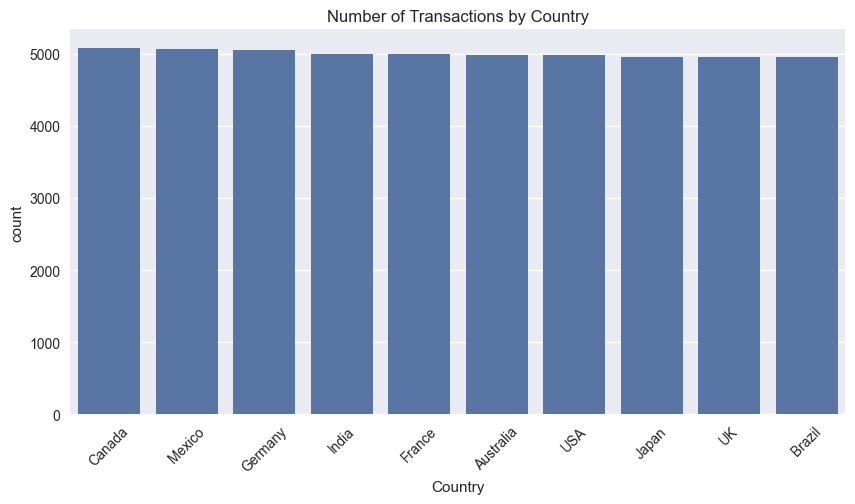

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Country", order=df['Country'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Transactions by Country")
plt.show()


## 5. Transactions by Product Category
We analyze the **distribution of transactions across product categories** to see which products are most popular among customers.


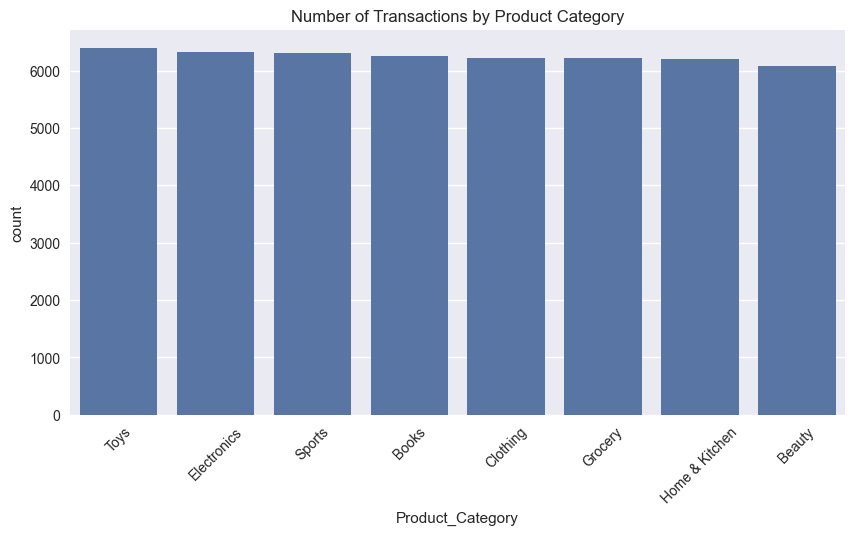

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Product_Category", order=df['Product_Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Transactions by Product Category")
plt.show()


## 6. Payment Method Distribution
We explore the **distribution of payment methods** used by customers (e.g., Debit Card, Credit Card, PayPal, etc.).


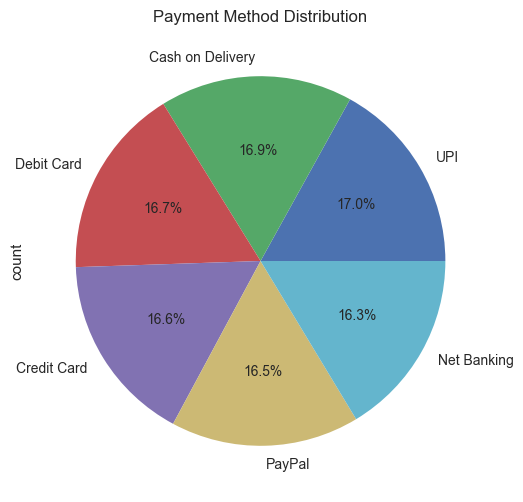

In [9]:
df['Payment_Method'].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Payment Method Distribution")
plt.show()


## 7. Distribution of Purchase Amount
We examine the distribution of purchase amounts to understand customer spending patterns.  
A histogram with KDE (Kernel Density Estimation) is used.


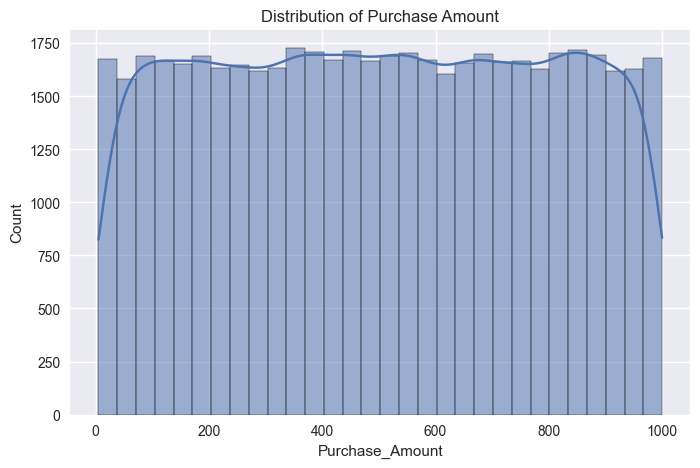

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Purchase_Amount'], bins=30, kde=True)
plt.title("Distribution of Purchase Amount")
plt.show()


## 9. Transaction Date Conversion
The **Transaction_Date** column is converted to datetime format.  
This is required to extract **Year** and **Month** for time-based analysis.


In [11]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])


## 10. Extract Year and Month
From the Transaction_Date, we extract:
- **Year** → for yearly trend analysis  
- **Month** → for seasonal/monthly sales analysis


In [12]:
df['Year'] = df['Transaction_Date'].dt.year
df['Month'] = df['Transaction_Date'].dt.month


## 11. Create Age Groups
We categorize customers into age groups:
- Youth (0–25)  
- Young Adult (26–45)  
- Adult (46–65)  
- Senior (66+)  

This allows us to analyze purchase behavior across different age segments.


In [13]:
bins = [0, 25, 45, 65, 100]
labels = ['Youth', 'Young Adult', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


## 12. Country-wise Sales Analysis
We calculate the **total purchase amount by country**.  
This shows which countries contribute the most revenue.


In [14]:
df.groupby('Country')['Purchase_Amount'].sum().sort_values(ascending=False).head(10)


Country
France       2545739.19
Canada       2544335.12
USA          2541220.22
Mexico       2534475.67
Australia    2514911.65
Brazil       2507287.54
India        2503542.71
Germany      2502442.20
Japan        2492312.20
UK           2471723.15
Name: Purchase_Amount, dtype: float64

## 13. Payment Method Revenue
We analyze total revenue generated by each payment method.  
This helps us understand which payment channels bring the most sales.


<Axes: xlabel='Payment_Method'>

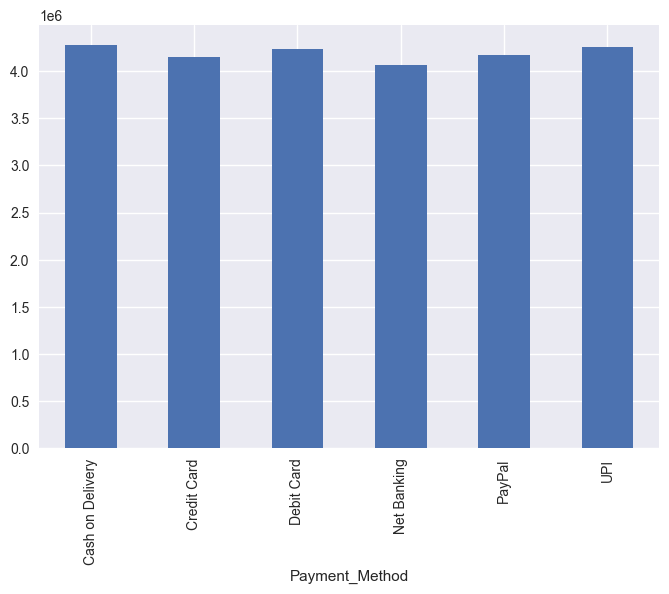

In [15]:
df.groupby('Payment_Method')['Purchase_Amount'].sum().plot(kind='bar')


## 14. Average Spend by Product Category
We calculate the **average purchase amount** for each product category.  
This highlights which categories have higher-value transactions.


In [16]:
df.groupby('Product_Category')['Purchase_Amount'].mean().sort_values(ascending=False)


Product_Category
Clothing          509.515739
Books             508.859316
Sports            506.231923
Beauty            503.273710
Grocery           502.587212
Home & Kitchen    500.716022
Toys              498.381158
Electronics       495.880544
Name: Purchase_Amount, dtype: float64

## 15. Monthly Sales Trend
We group transactions by **year and month** to analyze monthly sales.  
This reveals seasonality, trends, and year-over-year performance.


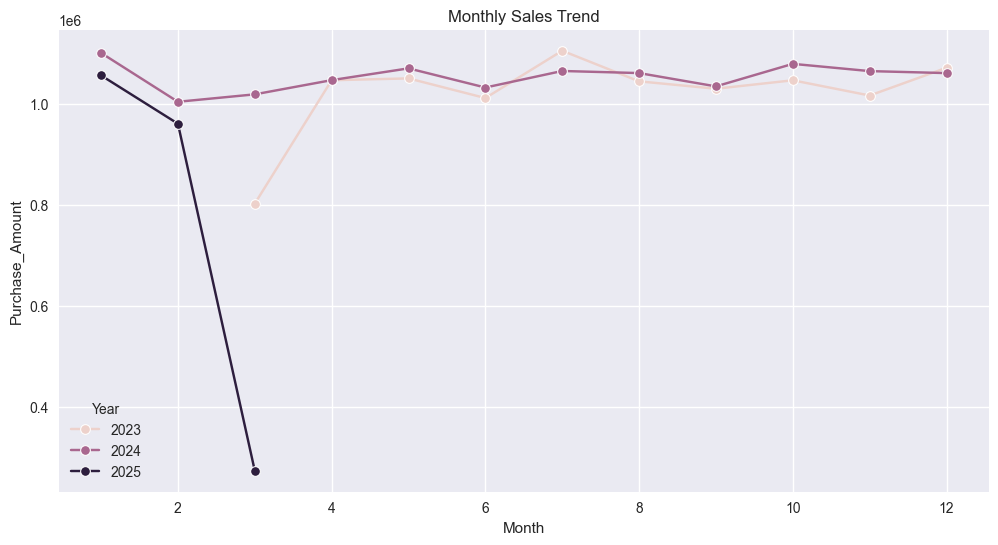

In [17]:
monthly_sales = df.groupby(['Year','Month'])['Purchase_Amount'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Purchase_Amount', hue='Year', marker="o")
plt.title("Monthly Sales Trend")
plt.show()


## 16. Transactions by Age Group
We grouped customers into four age categories:  
- Youth (0–25)  
- Young Adult (26–45)  
- Adult (46–65)  
- Senior (66+)  

The bar chart shows the number of transactions made by each age group.  
This helps us understand which age demographics are the most active customers.


In [18]:
import os, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
sns.set(style="whitegrid")
os.makedirs("figures", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

# Kafolat uchun:
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])
df["Year"]  = df["Transaction_Date"].dt.year
df["Month"] = df["Transaction_Date"].dt.month

bins   = [0, 25, 45, 65, 100]
labels = ["Youth", "Young Adult", "Adult", "Senior"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True, include_lowest=True)


## 17. Revenue by Age Group
This chart shows the total purchase amount generated by each age group.  
While the "Young Adult" and "Adult" groups make the highest number of transactions, they also contribute the most revenue.  
This helps businesses identify which customer demographics are the most valuable in terms of spending power.


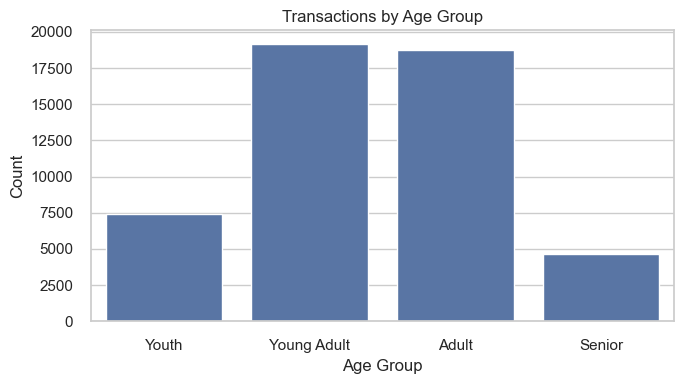

In [19]:
age_cnt = df["Age_Group"].value_counts().reindex(labels)
plt.figure(figsize=(7,4))
sns.barplot(x=age_cnt.index, y=age_cnt.values)
plt.title("Transactions by Age Group")
plt.xlabel("Age Group"); plt.ylabel("Count")
plt.tight_layout(); plt.savefig("figures/age_group_counts.png", dpi=150)


# --- 18. Revenue by Product Category ---
cat_amt = (df.groupby("Product_Category")["Purchase_Amount"]
             .agg(total="sum", avg="mean")
             .sort_values("total", ascending=False)
             .round(2))

display(cat_amt)

# total
plt.figure(figsize=(8,4))
sns.barplot(x=cat_amt.index, y=cat_amt["total"])
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category"); plt.ylabel("Total ($)")
plt.xticks(rotation=35)
plt.tight_layout(); plt.savefig("figures/category_revenue_total.png", dpi=150); plt.show()

# average
plt.figure(figsize=(8,4))
sns.barplot(x=cat_amt.index, y=cat_amt["avg"], color="tab:orange")
plt.title("Average Order Value by Product Category")
plt.xlabel("Product Category"); plt.ylabel("Average ($)")
plt.xticks(rotation=35)
plt.tight_layout(); plt.savefig("figures/category_aov.png", dpi=150); plt.show()

cat_amt.to_csv("outputs/category_revenue.csv")


C:\Users\Mac46-47\AppData\Local\Temp\ipykernel_4084\3637627251.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_amt = (df.groupby("Age_Group")["Purchase_Amount"]


,total,avg
Age_Group,,
Youth,3759841.83,505.15
Young Adult,9644526.06,503.87
Adult,9416356.75,501.46
Senior,2337265.01,503.94


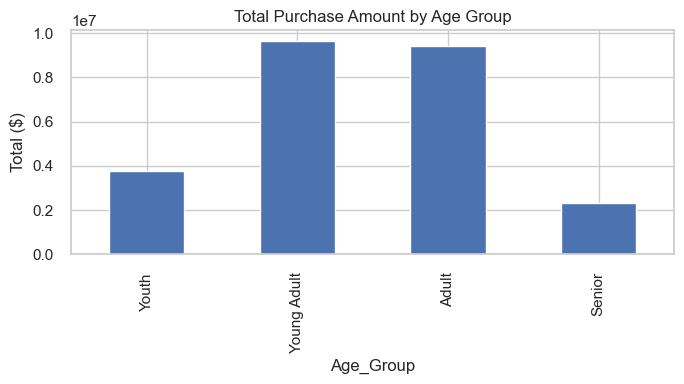

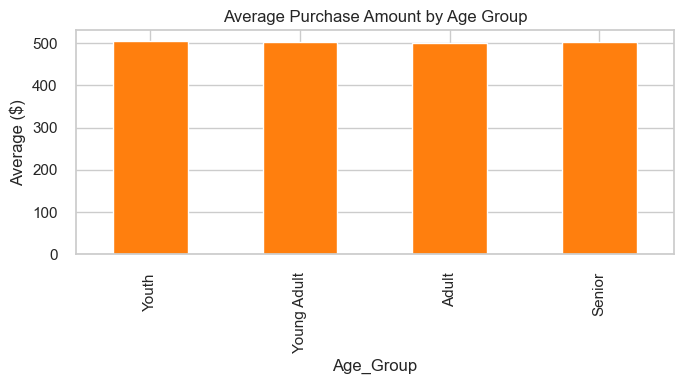

In [20]:
age_amt = (df.groupby("Age_Group")["Purchase_Amount"]
             .agg(total="sum", avg="mean")
             .reindex(labels))
display(age_amt.round(2))
ax = age_amt["total"].plot(kind="bar", figsize=(7,4))
plt.title("Total Purchase Amount by Age Group"); plt.ylabel("Total ($)")
plt.tight_layout(); plt.savefig("figures/age_group_total.png", dpi=150); plt.show()

ax = age_amt["avg"].plot(kind="bar", figsize=(7,4), color="tab:orange")
plt.title("Average Purchase Amount by Age Group"); plt.ylabel("Average ($)")
plt.tight_layout(); plt.savefig("figures/age_group_avg.png", dpi=150); plt.show()

age_amt.to_csv("outputs/age_group_amount.csv")


## 21. Top 10 Users by Total Spend
This chart highlights the top 10 customers based on their total spending.  
It helps identify high-value customers (VIPs), who can be targeted for loyalty programs, exclusive offers, or personalized marketing campaigns.


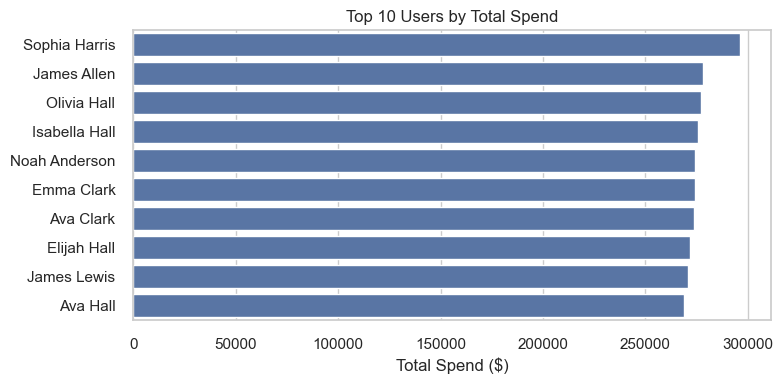

In [21]:
top_users = (df.groupby("User_Name")["Purchase_Amount"]
               .sum().sort_values(ascending=False).head(10))
plt.figure(figsize=(8,4))
sns.barplot(y=top_users.index, x=top_users.values)
plt.title("Top 10 Users by Total Spend"); plt.xlabel("Total Spend ($)"); plt.ylabel("")
plt.tight_layout(); plt.savefig("figures/top_users.png", dpi=150); plt.show()

top_users.to_csv("outputs/top_users.csv")


## Correlation Analysis
This heatmap shows the correlation between **Age** and **Purchase Amount**.  
It helps us identify whether customer age has any significant relationship with how much they spend.  


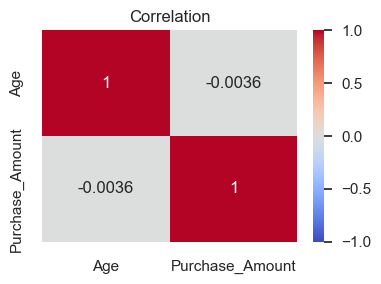

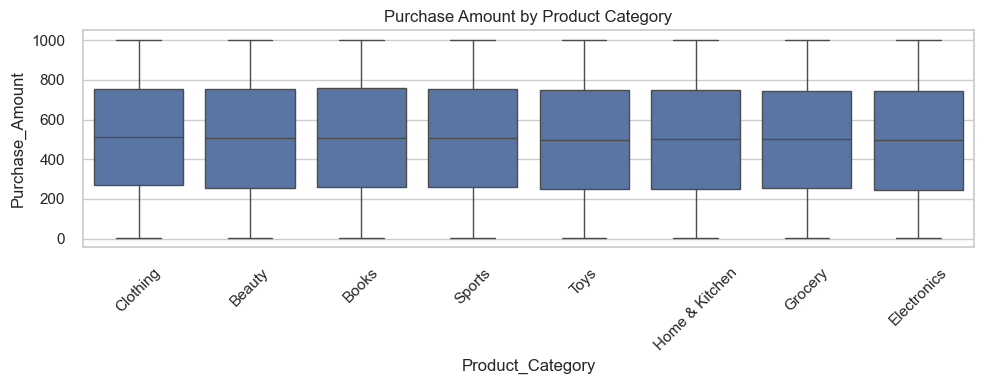

In [22]:
num = df[["Age","Purchase_Amount"]].copy()
plt.figure(figsize=(4,3))
sns.heatmap(num.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Correlation"); plt.tight_layout()
plt.savefig("figures/corr.png", dpi=150); plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x="Product_Category", y="Purchase_Amount")
plt.title("Purchase Amount by Product Category")
plt.xticks(rotation=45); plt.tight_layout()
plt.savefig("figures/box_by_category.png", dpi=150); plt.show()


## Revenue by Country and Product Category
This heatmap visualizes the total purchase amount across **countries** and **product categories**.  
It highlights regional differences in product demand and spending behavior.  


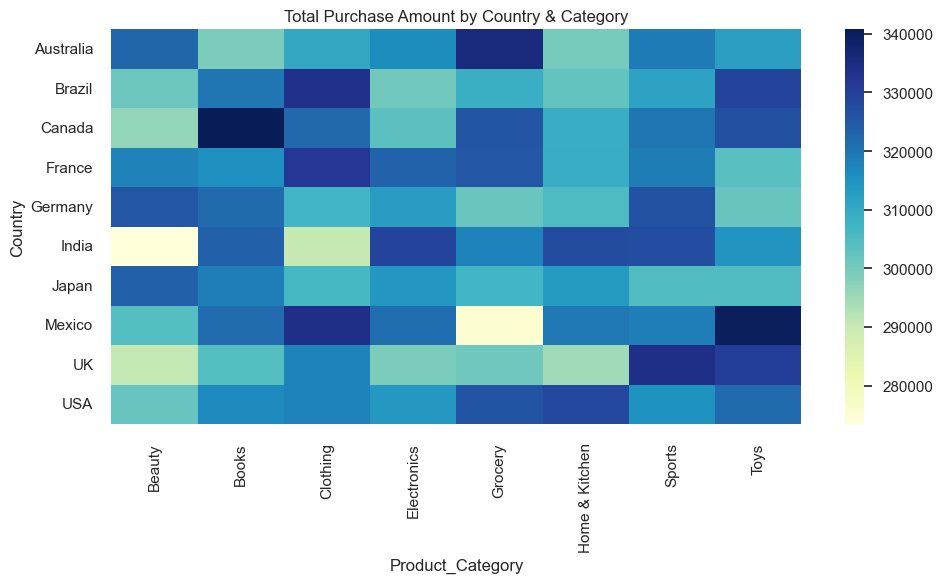

In [23]:
cc = df.pivot_table(index="Country", columns="Product_Category",
                    values="Purchase_Amount", aggfunc="sum", fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(cc, cmap="YlGnBu")
plt.title("Total Purchase Amount by Country & Category")
plt.tight_layout(); plt.savefig("figures/country_category_heatmap.png", dpi=150); plt.show()

cc.to_csv("outputs/country_category_sum.csv")


## Monthly Sales by Product Category
This line chart shows monthly sales trends for each product category across multiple years.  
It reveals **seasonal patterns** and helps identify which categories perform best at different times of the year.  


C:\Users\Mac46-47\AppData\Local\Temp\ipykernel_4084\4204195885.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(freq="M"), "Product_Category"])["Purchase_Amount"]
C:\Users\Mac46-47\AppData\Local\Temp\ipykernel_4084\4204195885.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=monthly_cat, x="Month", y="Purchase_Amount",


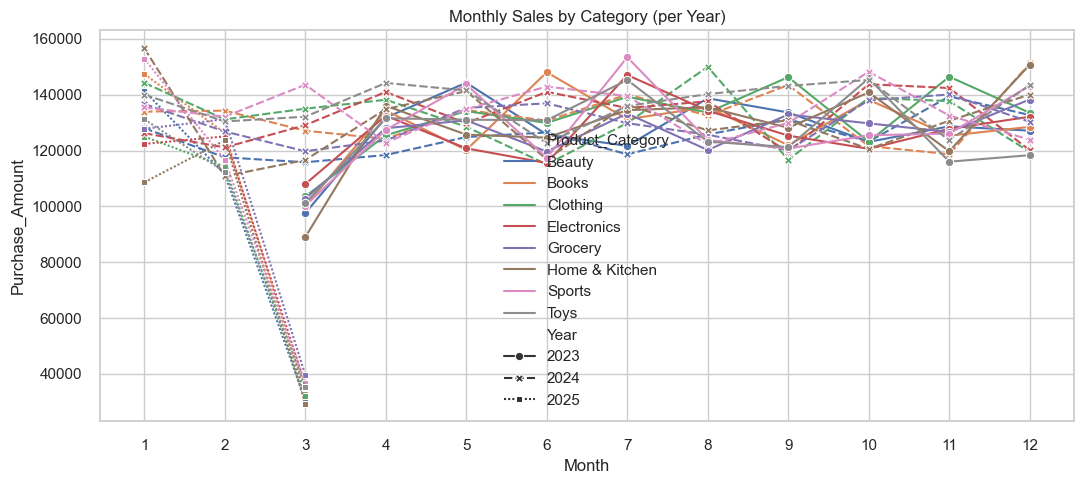

In [24]:
monthly_cat = (df.set_index("Transaction_Date")
                 .groupby([pd.Grouper(freq="M"), "Product_Category"])["Purchase_Amount"]
                 .sum().reset_index())
monthly_cat["Year"]  = monthly_cat["Transaction_Date"].dt.year
monthly_cat["Month"] = monthly_cat["Transaction_Date"].dt.month

plt.figure(figsize=(11,5))
sns.lineplot(data=monthly_cat, x="Month", y="Purchase_Amount",
             hue="Product_Category", style="Year", markers=True, ci=False)
plt.title("Monthly Sales by Category (per Year)"); plt.xticks(range(1,13))
plt.tight_layout(); plt.savefig("figures/monthly_by_category.png", dpi=150); plt.show()


## Month-over-Month (MoM) and Year-over-Year (YoY) Growth
We calculate the growth rate of total sales:  
- **MoM %**: Month-to-month growth in purchase amount  
- **YoY %**: Yearly comparison of sales for the same month across years  
This helps evaluate business performance trends.  


C:\Users\Mac46-47\AppData\Local\Temp\ipykernel_4084\281607273.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["Purchase_Amount"].sum()


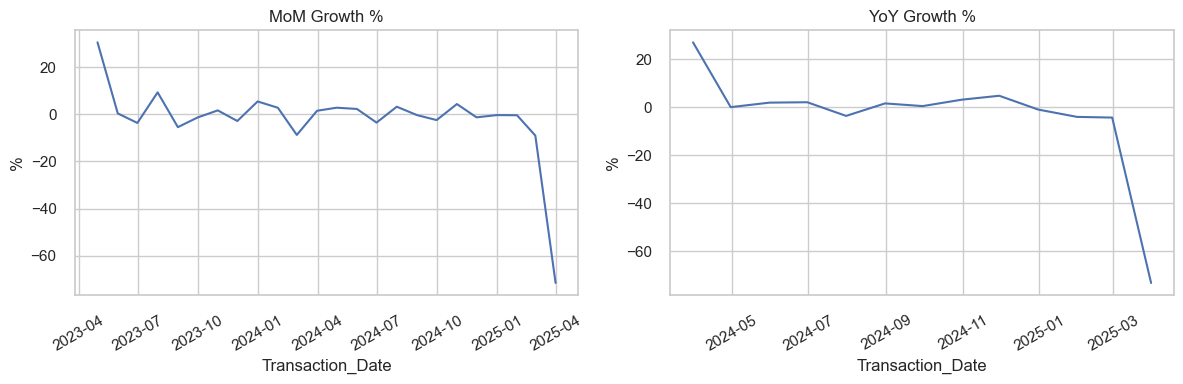

In [25]:
monthly_total = (df.set_index("Transaction_Date")
                   .resample("M")["Purchase_Amount"].sum()
                   .to_frame("Purchase_Amount"))
monthly_total["MoM_%"] = monthly_total["Purchase_Amount"].pct_change()*100
monthly_total["Year"]  = monthly_total.index.year
monthly_total["Month"] = monthly_total.index.month
monthly_total["YoY_%"] = monthly_total.groupby("Month")["Purchase_Amount"].pct_change()*100

fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(data=monthly_total, x=monthly_total.index, y="MoM_%", ax=ax[0])
ax[0].set_title("MoM Growth %"); ax[0].set_ylabel("%")
sns.lineplot(data=monthly_total, x=monthly_total.index, y="YoY_%", ax=ax[1])
ax[1].set_title("YoY Growth %"); ax[1].set_ylabel("%")
for a in ax: a.tick_params(axis="x", rotation=30)
plt.tight_layout(); plt.savefig("figures/mom_yoy.png", dpi=150); plt.show()

monthly_total.to_csv("outputs/monthly_total.csv")


## Payment Method Mix by Country
This stacked bar chart shows the distribution of payment methods across different countries.  
It highlights how customer payment preferences (Credit Card, Debit Card, UPI, etc.) vary by region.  


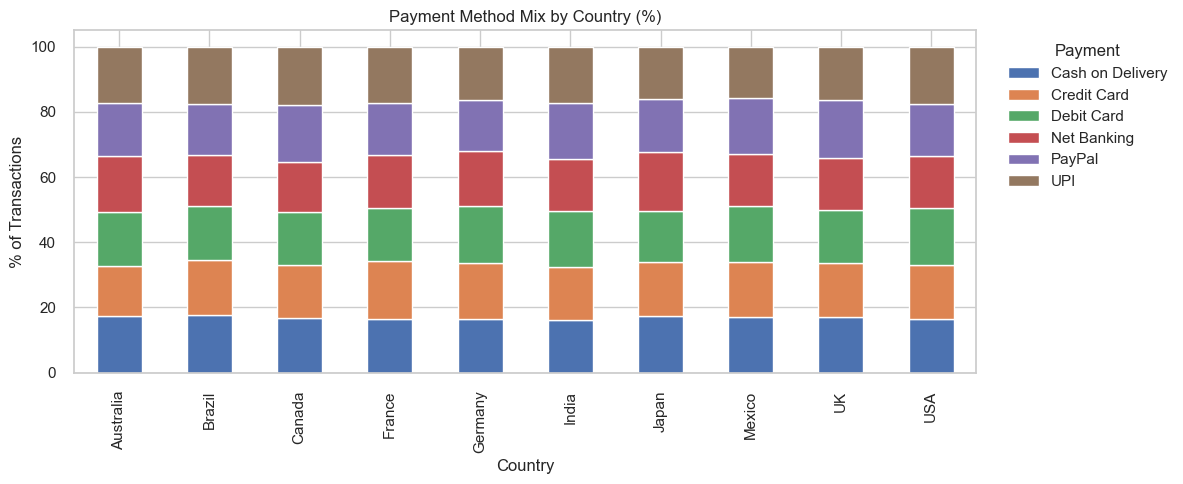

In [26]:
mix_country = df.pivot_table(index="Country", columns="Payment_Method",
                             values="Transaction_ID", aggfunc="count", fill_value=0)
mix_country_pct = mix_country.div(mix_country.sum(axis=1), axis=0)*100
ax = mix_country_pct.sort_index().plot(kind="bar", stacked=True, figsize=(12,5))
plt.title("Payment Method Mix by Country (%)"); plt.ylabel("% of Transactions")
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", title="Payment")
plt.tight_layout(); plt.savefig("figures/payment_mix_country.png", dpi=150); plt.show()

mix_country_pct.to_csv("outputs/payment_mix_country_pct.csv")


## Payment Method Mix by Product Category
This chart shows which payment methods are preferred for different product categories.  
It helps identify **category-specific payment behavior**.  


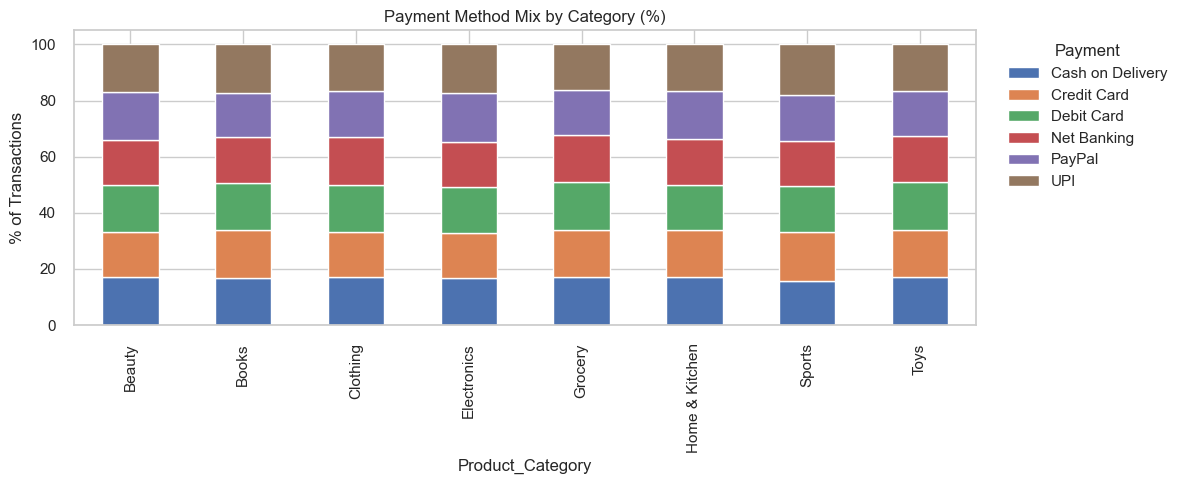

In [27]:
mix_cat = df.pivot_table(index="Product_Category", columns="Payment_Method",
                         values="Transaction_ID", aggfunc="count", fill_value=0)
mix_cat_pct = mix_cat.div(mix_cat.sum(axis=1), axis=0)*100
ax = mix_cat_pct.sort_index().plot(kind="bar", stacked=True, figsize=(12,5))
plt.title("Payment Method Mix by Category (%)"); plt.ylabel("% of Transactions")
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", title="Payment")
plt.tight_layout(); plt.savefig("figures/payment_mix_category.png", dpi=150); plt.show()

mix_cat_pct.to_csv("outputs/payment_mix_category_pct.csv")


## RFM Clustering (Customer Segmentation)
We applied **RFM analysis (Recency, Frequency, Monetary)** and used **K-Means clustering** to group customers into 4 clusters.  
This segmentation helps businesses identify loyal customers, high spenders, and those at risk of churn.  


,Recency,Frequency,Monetary
Cluster,,,
0,1.0,477.0,236537.9
1,5.5,470.5,230676.8
2,1.0,521.0,264606.4
3,2.0,501.0,252086.7


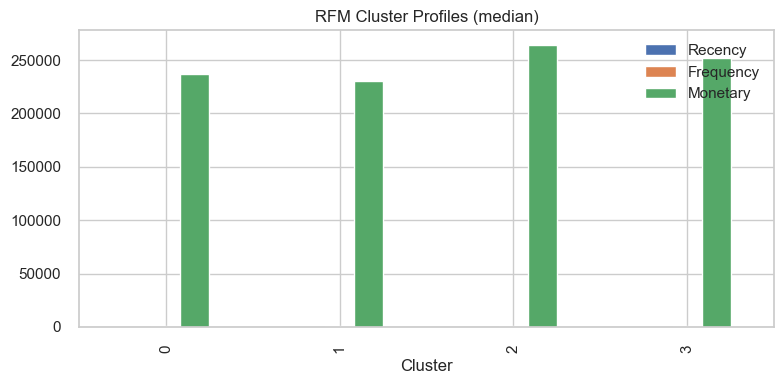

In [28]:
snapshot_date = df["Transaction_Date"].max() + pd.Timedelta(days=1)
rfm = (df.groupby("User_Name").agg(
        Recency=("Transaction_Date", lambda x: (snapshot_date - x.max()).days),
        Frequency=("Transaction_ID", "nunique"),
        Monetary=("Purchase_Amount", "sum")
      ).reset_index())

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
X = rfm[["Recency","Frequency","Monetary"]]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(X_scaled)

rfm_profile = rfm.groupby("Cluster")[["Recency","Frequency","Monetary"]].median()
display(rfm_profile.round(1))
rfm_profile.plot(kind="bar", figsize=(8,4))
plt.title("RFM Cluster Profiles (median)"); plt.tight_layout()
plt.savefig("figures/rfm_profiles.png", dpi=150); plt.show()

rfm.to_csv("outputs/rfm_users.csv", index=False)


## Outlier Detection in Purchase Amount
Outliers were detected in the `Purchase_Amount` column using the **Interquartile Range (IQR) method**.  
We compared:  
- **Raw Purchase Amount** (with outliers)  
- **Winsorized Purchase Amount** (after capping extreme values)  
This ensures more reliable statistical analysis.  


Outliers: 0 of 50000  (0.00%)


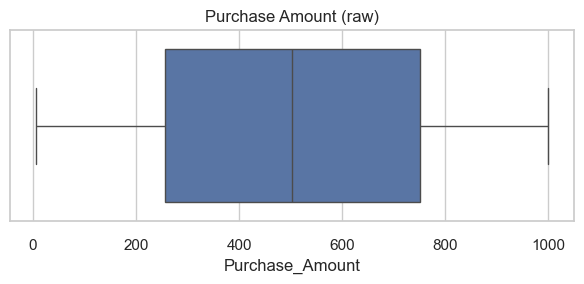

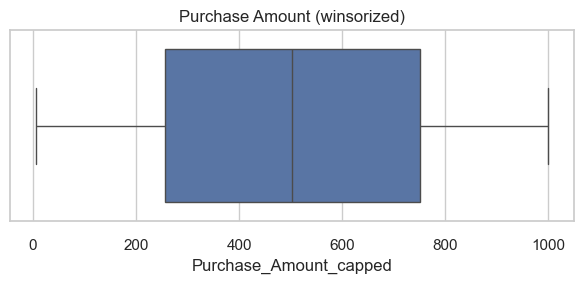

In [29]:
Q1 = df["Purchase_Amount"].quantile(0.25)
Q3 = df["Purchase_Amount"].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

outliers = df[(df["Purchase_Amount"] < lower) | (df["Purchase_Amount"] > upper)]
print(f"Outliers: {len(outliers)} of {len(df)}  ({len(outliers)/len(df):.2%})")

plt.figure(figsize=(6,3))
sns.boxplot(x=df["Purchase_Amount"]); plt.title("Purchase Amount (raw)")
plt.tight_layout(); plt.savefig("figures/box_raw.png", dpi=130); plt.show()

df["Purchase_Amount_capped"] = df["Purchase_Amount"].clip(lower, upper)
plt.figure(figsize=(6,3))
sns.boxplot(x=df["Purchase_Amount_capped"]); plt.title("Purchase Amount (winsorized)")
plt.tight_layout(); plt.savefig("figures/box_winsorized.png", dpi=130); plt.show()
